In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.linear_model import LinearRegression

___

### Train Data

In [406]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)
btcTrain = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits"], axis = 1)
btcTrain=btcTrain.set_index(np.arange(btcTrain.shape[0]))

startDate = dt.datetime(2016,1,10)
endDate = dt.datetime(2021,1,10)
btcTomorrowTrain = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTrain=btcTomorrowTrain.set_index(np.arange(btcTomorrowTrain.shape[0]))

btcTrain["CloseTomorrow"] = btcTomorrowTrain["Close"]
btcTrain

,Open,High,Low,Close,Volume,CloseTomorrow
0,425.875000,432.920990,418.734985,430.566986,45996600,447.610992
1,430.721008,436.246002,427.515015,434.334015,36278900,447.990997
2,434.622009,436.062012,431.869995,433.437988,30096600,448.428009
3,433.578003,433.743011,424.705994,430.010986,39633800,435.690002
4,430.061005,434.516998,429.084015,433.091003,38477500,432.371002
...,...,...,...,...,...,...
1823,26439.373047,28288.839844,25922.769531,26272.294922,66479895605,33992.429688
1824,26280.822266,27389.111328,26207.640625,27084.808594,49056742893,36824.363281
1825,27081.810547,27370.720703,25987.298828,27362.437500,45265946774,39371.042969
1826,27360.089844,28937.740234,27360.089844,28840.953125,51287442704,40797.609375


### Test Data

In [407]:
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)
btcTest = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits"], axis = 1)
btcTest=btcTest.set_index(np.arange(btcTest.shape[0]))


startDate = dt.datetime(2021,1,10)
endDate = dt.datetime(2022,1,10)
btcTomorrowTest = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTest=btcTomorrowTest.set_index(np.arange(btcTomorrowTest.shape[0]))

btcTest["CloseTomorrow"] = btcTomorrowTest["Close"]
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)
history = btc.history(start=startDate, end=endDate)

btcTest

,Open,High,Low,Close,Volume,CloseTomorrow
0,28841.574219,29244.876953,28201.992188,29001.720703,46754964848,40254.546875
1,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,38356.441406
2,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,35566.656250
3,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,33922.960938
4,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,37316.359375
...,...,...,...,...,...,...
361,50802.609375,51956.328125,50499.468750,50640.417969,24324345758,43569.003906
362,50679.859375,50679.859375,47414.210938,47588.855469,33430376883,43160.929688
363,47623.871094,48119.742188,46201.496094,46444.710938,30049226299,41557.902344
364,46490.605469,47879.964844,46060.312500,47178.125000,26686491018,41733.941406


____

### Model

In [408]:
linearModel = LinearRegression()
model = linearModel.fit(btcTrain.drop(["CloseTomorrow"], axis = 1),btcTrain["CloseTomorrow"])

### Test

In [409]:
results = []
for i in range(btcTest.shape[0]):
    data = []
    for j in range(4):
        data.append([btcTest.iloc[i][j]])
    data = pd.DataFrame(data).T
    results.append(model.predict(data)[0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

____

### Visualizition

#### Lineplot

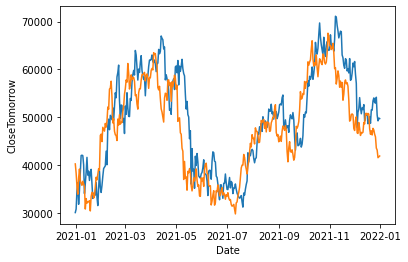

In [ ]:
sns.lineplot(y=results, x=history.index)
sns.lineplot(y=btcTest["CloseTomorrow"], x=history.index);

In [ ]:
results[-1]

49735.44347132917